In [2]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

credit = pd.read_csv('credit_card.csv')

In [3]:
print("data null \n", credit.isnull().sum())
print("data kosong \n", credit.empty)
print("data nan \n", credit.isna().sum())

data null 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64
data kosong 
 False
data nan 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


In [4]:
df_credit = credit.drop(['Customer Key', 'Sl_No'], axis=1)
df_credit.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
5,20000,3,0,1,8
6,100000,5,0,11,2
7,15000,3,0,1,1
8,5000,2,0,2,2
9,3000,4,0,1,7


<Axes: >

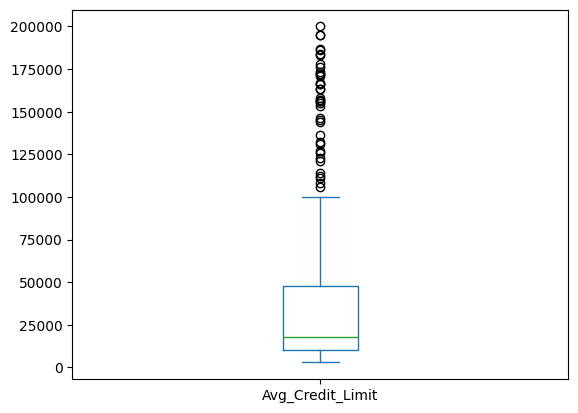

In [5]:
df_credit['Avg_Credit_Limit'].plot(kind='box')

jumlah data sebelum dibuang outlier 660
jumlah data sesudah dibuang outlier 621


<Axes: >

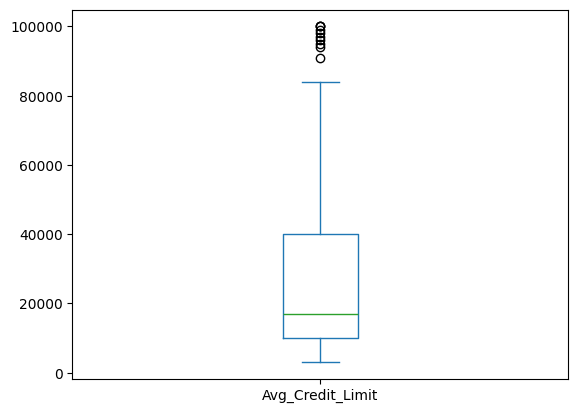

In [6]:
from pandas.api.types import is_numeric_dtype

def remove_outlier(data_frame, kolom_outlier):
    Q1 = data_frame[kolom_outlier].quantile(0.25)
    Q3 = data_frame[kolom_outlier].quantile(0.75)
    IQR = Q3 - Q1
    filter = (data_frame[kolom_outlier] >= Q1 - 1.5 * IQR) & (data_frame[kolom_outlier] <= Q3 + 1.5 * IQR)
    return data_frame.loc[filter]

data_bersih = remove_outlier(df_credit, 'Avg_Credit_Limit')

print("jumlah data sebelum dibuang outlier", df_credit.shape[0])
print("jumlah data sesudah dibuang outlier", data_bersih.shape[0])

data_bersih['Avg_Credit_Limit'].plot(kind='box')

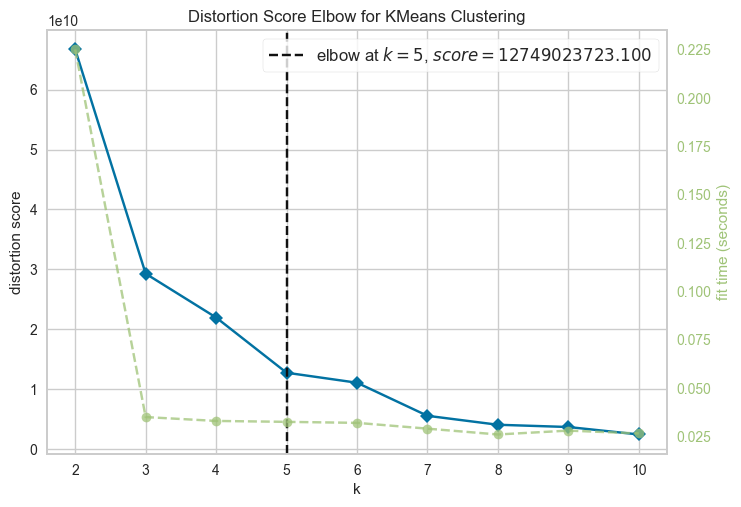

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
import warnings
warnings.filterwarnings('ignore')
from yellowbrick.cluster import KElbowVisualizer

KMeansC = KMeans(random_state=0)
vis = KElbowVisualizer(KMeansC, k=(2,11))
dataB = data_bersih
vis.fit(data_bersih)
vis.show()

Silhouette Score K-Means for  2 clusters :  0.7275517813087928
Silhouette Score K-Means for  3 clusters :  0.7058100919802311
Silhouette Score K-Means for  4 clusters :  0.5866654641248105
Silhouette Score K-Means for  5 clusters :  0.5986950720392292
Silhouette Score K-Means for  6 clusters :  0.6176747811139572
Silhouette Score K-Means for  7 clusters :  0.6103882163480778
Silhouette Score K-Means for  8 clusters :  0.6075810437922412
Silhouette Score K-Means for  9 clusters :  0.6096304412033485
Silhouette Score K-Means for  10 clusters :  0.6018947667713821


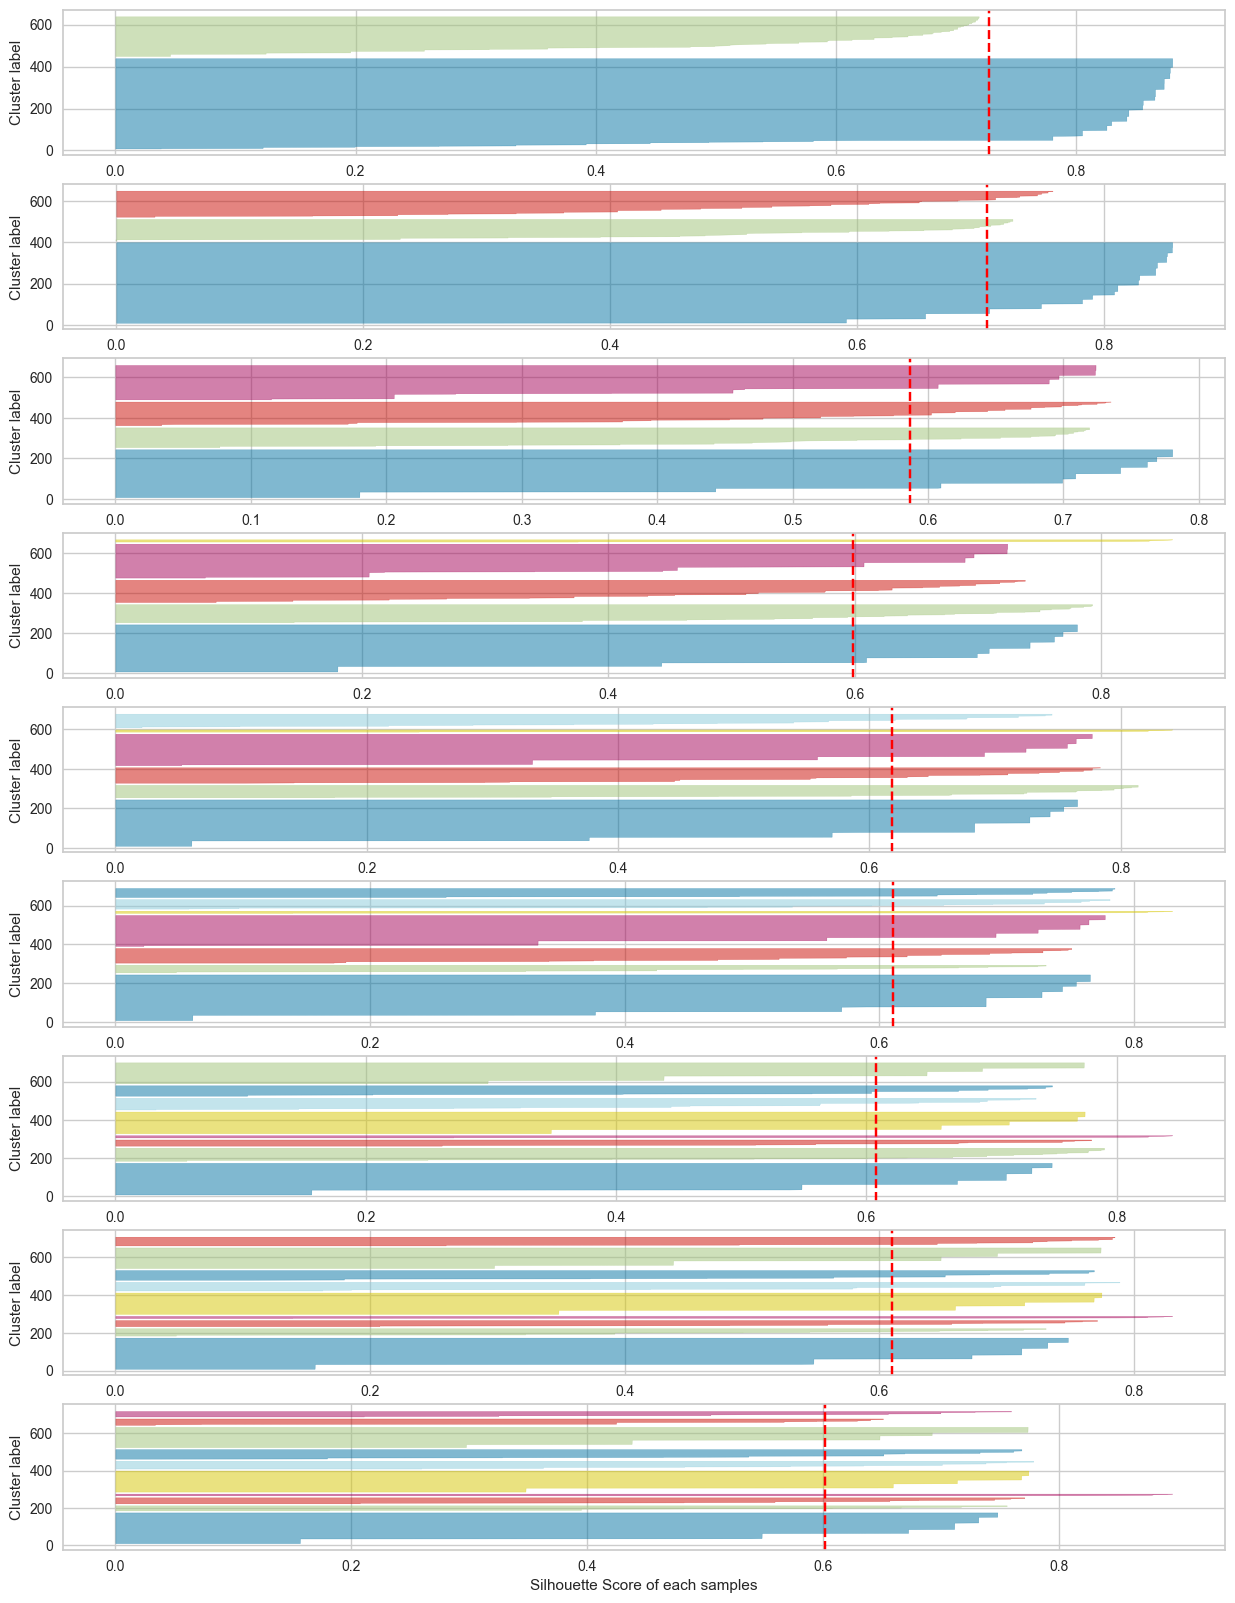

In [8]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(9, 1, figsize=(15,20))

for k in range(2, 11):
    KMeansC = KMeans(n_clusters=k,init='k-means++' ,random_state=33)
    KM_clusters = KMeansC.fit_predict(data_bersih)
    print('Silhouette Score K-Means for ' , k , 'clusters : ' , silhouette_score(data_bersih, KM_clusters))
    
    sil_vis = SilhouetteVisualizer(KMeansC, colors='yellowbrick', ax=ax[k-2])
    sil_vis.fit(data_bersih)
    
    ax[k-2].set(xlabel='Silhouette Score of each samples', ylabel='Cluster label')

In [9]:
data_bersih.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

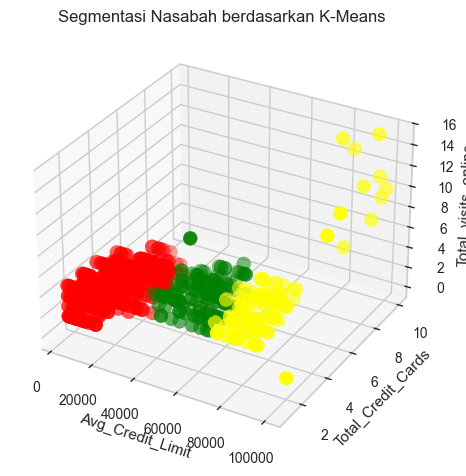

Silhouette Score K-Means: 0.706


In [10]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
K_clusters = kmeans.fit_predict(data_bersih)

fig = plt.figure()
ax = plt.axes(projection='3d')

cluster_colors = {0: 'red', 1: 'yellow', 2: 'green', 3: 'blue', 4: 'magenta', 5: 'black', 6: 'cyan'}

dataB=data_bersih

ax.scatter(dataB['Avg_Credit_Limit'], dataB['Total_Credit_Cards'], dataB['Total_visits_online'], c=[cluster_colors[i] for i in K_clusters], s=100)

plt.title('Segmentasi Nasabah berdasarkan K-Means')
ax.set_xlabel('Avg_Credit_Limit')
ax.set_ylabel('Total_Credit_Cards')
ax.set_zlabel('Total_visits_online')
plt.show()

print('Silhouette Score K-Means: %0.3f' % silhouette_score(dataB, K_clusters))

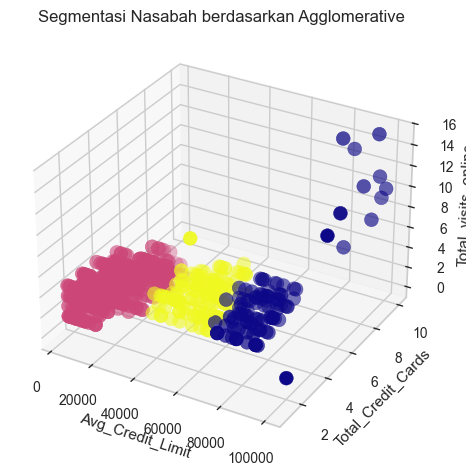

Silhouette Score K-Means: 0.705


In [11]:
import seaborn as sns
from matplotlib.colors import ListedColormap
AGG = AgglomerativeClustering(n_clusters=3, linkage='ward')

dataB = data_bersih
AGG_clusters = AGG.fit_predict(dataB)
cmap = ListedColormap(sns.color_palette('plasma', 256).as_hex())

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(dataB['Avg_Credit_Limit'], dataB['Total_Credit_Cards'], dataB['Total_visits_online'], c=AGG_clusters, cmap=cmap, s=100)

plt.title('Segmentasi Nasabah berdasarkan Agglomerative')
ax.set_xlabel('Avg_Credit_Limit')
ax.set_ylabel('Total_Credit_Cards')
ax.set_zlabel('Total_visits_online')
plt.show()

print('Silhouette Score K-Means: %0.3f' % silhouette_score(dataB, AGG_clusters))

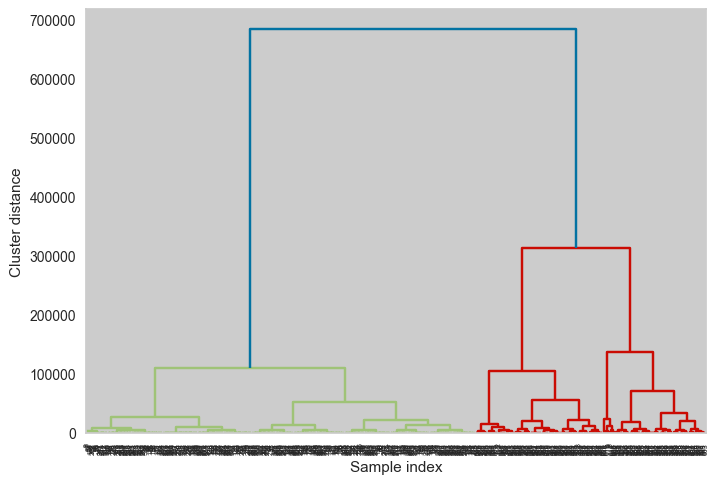

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_array = linkage(data_bersih, method='ward')
dendrogram(linkage_array)

plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show()

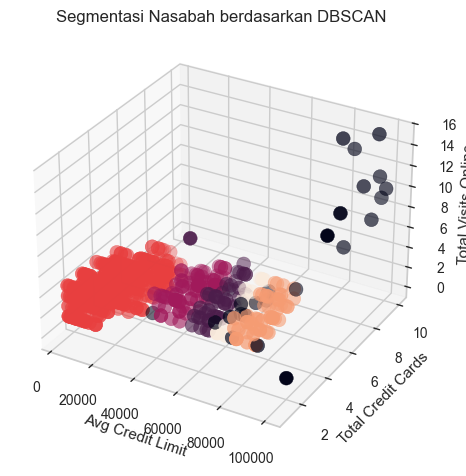

Silhouette Score K-Means: 0.657


In [13]:
DBSC = DBSCAN(min_samples=20, eps=2500)

DBSC_clusters = DBSC.fit_predict(data_bersih)

from matplotlib.colors import ListedColormap

cmap = ListedColormap(sns.color_palette("rocket", 256).as_hex())

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(data_bersih['Avg_Credit_Limit' ], data_bersih['Total_Credit_Cards' ], data_bersih['Total_visits_online' ],
           c=DBSC_clusters, cmap=cmap, s=100)

plt.title('Segmentasi Nasabah berdasarkan DBSCAN')
ax.set_xlabel('Avg Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()

print('Silhouette Score K-Means: %0.3f' % silhouette_score(data_bersih, DBSC_clusters))

In [14]:
import pickle

with open('KMeans_model.pkl','wb') as r:
    pickle.dump((kmeans),r)

with open('AGG_model.pkl','wb') as r:
    pickle.dump((AGG),r)

with open('DBSCAN_model.pkl','wb') as r:
    pickle.dump((DBSC),r)

print("Model berhasil disimpan")

Model berhasil disimpan
